<a href="https://colab.research.google.com/github/NavyaKommireddy/FMML_ASSIGNMENT_AND_LABS/blob/main/module9_lab2_FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

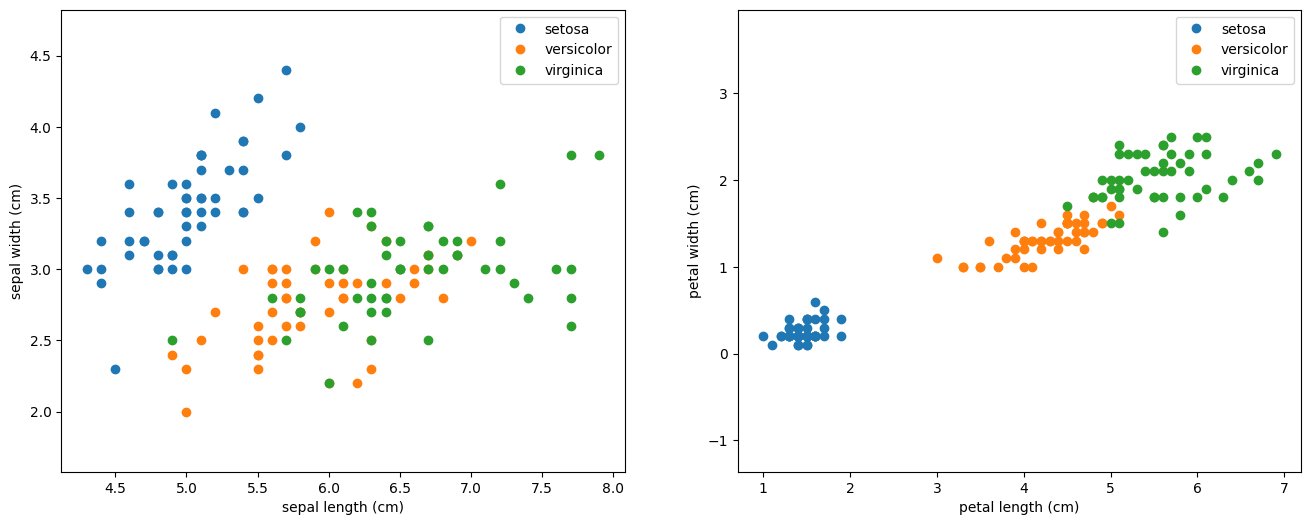

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

# Plot training progress

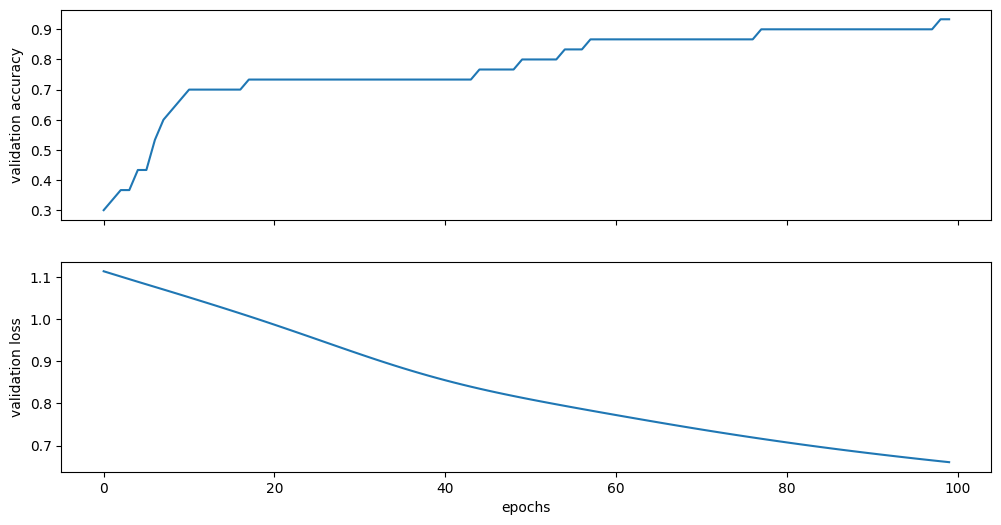

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

1.Sure, changing the number of hidden layers in a neural network can have a significant impact on its performance and capabilities. Adding more hidden layers can sometimes allow the network to learn more complex patterns in the data, potentially leading to better performance on certain tasks. However, adding too many layers can also increase the risk of overfitting, where the model performs well on the training data but poorly on new, unseen data.

Similarly, reducing the number of hidden layers can simplify the model and reduce the risk of overfitting, but it may also limit the model's ability to learn complex patterns in the data.

When experimenting with the number of hidden layers, it's important to consider factors such as the size of the dataset, the complexity of the task, and the computational resources available for training. Additionally, techniques such as regularization and cross-validation can help mitigate overfitting and guide the selection of the optimal number of hidden layers for a give task.

2.Adjusting the number of neurons in the hidden layer(s) of a neural network is another way to tune its architecture.

Increasing the number of neurons in a hidden layer can potentially allow the network to capture more intricate features in the data, giving it more capacity to learn complex patterns. However, this also comes with a higher computational cost and an increased risk of overfitting, especially if the model becomes too large relative to the size of the dataset.

On the other hand, reducing the number of neurons in a hidden layer can lead to a simpler model that generalizes better to new data, as it's less likely to memorize noise or outliers in the training set. However, reducing the number of neurons too much may result in underfitting, where the model is too simplistic to capture the underlying patterns in the data.

Finding the optimal number of neurons in a hidden layer often involves experimentation and tuning based on the specific characteristics of the dataset and the task at hand. Techniques like cross-validation and grid search can be used to systematically explore different configurations and identify the one that yields the best performance. Additionally, regularization techniques like dropout or L2 regularization can help prevent overfitting when using larger networks with more neurons.


3.Changing the activation function in a neural network can significantly impact its behavior and performance. The activation function introduces non-linearity to the network, allowing it to learn complex relationships in the data.

Here are some commonly used activation functions and their characteristics:

ReLU (Rectified Linear Unit):
�
(
�
)
=
max
⁡
(
0
,
�
)
f(x)=max(0,x)
Simple and computationally efficient.
Helps mitigate the vanishing gradient problem.
However, can suffer from the "dying ReLU" problem where neurons can become inactive during training.
Sigmoid:
�
(
�
)
=
1
1
+
�
−
�
f(x)=
1+e
−x

1
​

Squashes the output between 0 and 1, suitable for binary classification problems.
Prone to vanishing gradient problem, especially in deep networks.
Outputs are not zero-centered, which can lead to issues in optimization.
Tanh (Hyperbolic Tangent):
�
(
�
)
=
�
�
−
�
−
�
�
�
+
�
−
�
f(x)=
e
x
 +e
−x

e
x
 −e
−x

​

Similar to sigmoid but outputs are zero-centered (-1 to 1).
Helps mitigate the vanishing gradient problem compared to sigmoid.
Still suffers from vanishing gradients in deep networks.
Leaky ReLU:
�
(
�
)
=
{
�
if
�
>
0
�
�
otherwise
f(x)={
x
αx
​
  
if x>0
otherwise
​
 , where
�
α is a small constant (e.g., 0.01).
Addresses the dying ReLU problem by allowing a small gradient for negative inputs.
Prevents neurons from being completely inactive during training.
Softmax: Used in the output layer for multi-class classification tasks to convert raw scores into probabilities that sum up to 1.
Experimenting with different activation functions can help find the one that works best for a particular dataset and task. For example, ReLU is often a good default choice for hidden layers due to its simplicity and effectiveness in many scenarios. However, it's always worth trying out alternatives like Leaky ReLU or variants of ReLU such as Parametric ReLU (PReLU) or Exponential Linear Unit (ELU) to see if they offer any improvements in performance.